In [22]:
import scipy.io as sio
import matlab.engine
import numpy as np

mat = matlab.engine.start_matlab()

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

In [24]:
def plot_score(data, exp):
    
    other_idx = np.ones((13,))
    for c in cType[1][0]:
        other_idx[c] = 0
    for c in cType[1][1]:
        other_idx[c] = 0

    others = np.arange(13)[other_idx.astype(bool)]
    plt.figure()
    plt.errorbar(others, data[others,0], yerr=data[others,1], fmt='o', capsize=3, c = 'black')
    pos = plt.errorbar(cType[1][0],data[cType[1][0],0], yerr=data[cType[1][0],1], fmt='o', capsize=3, c = 'limegreen')
    neg = plt.errorbar(cType[1][1],data[cType[1][1],0], yerr=data[cType[1][1],1], fmt='o', capsize=3, c = 'red')

    ax = plt.gca()
    ax.set_xticks(np.arange(13))
    ax.set_xticklabels(behav_name)

    if exp=='1':
        pos.set_label(cType[0][0])
        neg.set_label(cType[0][1])
        ax.legend(title='Trained Classes')

    plt.xticks(rotation=45)
    plt.ylabel('Classifier projection');
    plt.title('Projections onto ' + cType[0][0] + ' vs. ' + cType[0][1] + ' classifier in Exp' + exp)
    plt.tight_layout()
    
    filename = cType[0][0] + '_vs_' + cType[0][1] + '_scores_Exp' + exp
    plt.savefig(filename+'.png', dpi=450)

In [25]:
path1 = '/mnt/cube/home/lkueida/Documents/MATLAB/MemoryFinale/LOSO/Exp1/'
path2 = '/mnt/cube/home/lkueida/Documents/MATLAB/MemoryFinale/LOSO/Exp2/'
path3 = '/mnt/cube/home/lkueida/Documents/MATLAB/MemoryFinale/LOSO/Exp3/'
path4 = '/mnt/cube/home/lkueida/Documents/MATLAB/MemoryFinale/LOSO/Exp4/'


In [26]:
SNMN = [('SN','MN'), ([11,12],[9,10]), 'CRM_SN_vs_MN']
SCCR = [('SC','CR'), ([0,3,6],[10,12]), 'SC_vs_CR']
RSF = [('RS','F'), ([0],[6,7]), 'RS_vs_F']
# ROSN = [('SCSI-RO','SN'), ([3,4],[11,12]), 'SCSIRO_vs_SN']
cType = RSF

In [27]:
behav_label = [(1,1),(3,1),(5,1),(1,2),(3,2),(5,2),(1,3),(3,3),(5,3),(4,4),(2,4),(4,5),(2,5)]
behav_name = ['SC-RS','SI-RS','FA-RS','SC-RO','SI-RO','FA-RO','SC-F','SI-F','FA-F','M-MN','CR-MN','M-SN','CR-SN']

In [28]:
filename1 = path1 + 'data_' + cType[2] + '_imbalLDA_order_proj_1.mat'
# filename2 = path2 + 'data_' + cType[2] + '_imbalLDA_order_proj_2.mat'
# filename3 = path3 + 'data_' + cType[2] + '_imbalLDA_order_proj_3.mat'
# filename4 = path4 + 'data_' + cType[2] + '_imbalLDA_order_proj_4.mat'

In [29]:
filename1 = "data_RS_vs_F_imbalLDA_order_proj_1.mat"

In [30]:
file1 = mat.load(filename1, nargout=1)
# file2 = mat.load(filename2, nargout=1)
# file3 = mat.load(filename3, nargout=1)
# file4 = mat.load(filename4, nargout=1)

user_len_1 = len(file1['user_prob_1'])
# user_len_2 = len(file2['user_prob_2'])
# user_len_3 = len(file3['user_prob_3'])
# user_len_4 = len(file4['user_prob_4'])

In [31]:
user_len_1

26

In [40]:
# projection
file1["user_prob_1"][0]

# Source
file1['user_source_1'][0]

# Response
file1["user_resp_1"][0]

""

''

In [12]:
stat_1 = np.zeros((13,2))

for i in range(13):
    user_score = []
    for u in range(user_len_1):

        temp_score = file1['user_prob_1'][u]
        temp_source = file1['user_source_1'][u]
        temp_resp = file1['user_resp_1'][u]
        
        temp_score = np.array(temp_score._data).reshape(temp_score.size, order='F')
        temp_source = np.array(temp_source._data).reshape(temp_source.size, order='F')
        temp_resp = np.array(temp_resp._data).reshape(temp_resp.size, order='F')
        
        # filter out the specific label combination to calculate projection
        b = (temp_source==behav_label[i][0]) & (temp_resp==behav_label[i][1])
        user_score.append(temp_score[b, np.newaxis])
        
    #
    b_data = np.vstack(user_score)
    stat_1[i,0] = np.mean(b_data)
    stat_1[i,1] = 1.96*np.std(b_data)/np.sqrt(b_data.shape[0])
    

In [13]:
stat_2 = np.zeros((13,2))

for i in range(13):
    user_score = []
    for u in range(user_len_2):

        temp_score = file2['user_prob_2'][u]
        temp_source = file2['user_source_2'][u]
        temp_resp = file2['user_resp_2'][u]
        temp_score = np.array(temp_score._data).reshape(temp_score.size, order='F')
        temp_source = np.array(temp_source._data).reshape(temp_source.size, order='F')
        temp_resp = np.array(temp_resp._data).reshape(temp_resp.size, order='F')
        b = (temp_source==behav_label[i][0]) & (temp_resp==behav_label[i][1])
        user_score.append(temp_score[b, np.newaxis])
        
    b_data = np.vstack(user_score)
    stat_2[i,0] = np.mean(b_data)
    stat_2[i,1] = np.std(b_data)/np.sqrt(b_data.shape[0])
    

NameError: name 'user_len_2' is not defined

In [63]:
stat_3 = np.zeros((13,2))

for i in range(13):
    user_score = []
    for u in range(user_len_3):

        temp_score = file3['user_prob_3'][u]
        temp_source = file3['user_source_3'][u]
        temp_resp = file3['user_resp_3'][u]
        temp_score = np.array(temp_score._data).reshape(temp_score.size, order='F')
        temp_source = np.array(temp_source._data).reshape(temp_source.size, order='F')
        temp_resp = np.array(temp_resp._data).reshape(temp_resp.size, order='F')
        b = (temp_source==behav_label[i][0]) & (temp_resp==behav_label[i][1])
        user_score.append(temp_score[b, np.newaxis])
        
    b_data = np.vstack(user_score)
    stat_3[i,0] = np.mean(b_data)
    stat_3[i,1] = np.std(b_data)/np.sqrt(b_data.shape[0])
    

In [64]:
stat_4 = np.zeros((13,2))

for i in range(13):
    user_score = []
    for u in range(user_len_4):

        temp_score = file4['user_prob_4'][u]
        temp_source = file4['user_source_4'][u]
        temp_resp = file4['user_resp_4'][u]
        temp_score = np.array(temp_score._data).reshape(temp_score.size, order='F')
        temp_source = np.array(temp_source._data).reshape(temp_source.size, order='F')
        temp_resp = np.array(temp_resp._data).reshape(temp_resp.size, order='F')
        b = (temp_source==behav_label[i][0]) & (temp_resp==behav_label[i][1])
        user_score.append(temp_score[b, np.newaxis])
        
    b_data = np.vstack(user_score)
    stat_4[i,0] = np.mean(b_data)
    stat_4[i,1] = np.std(b_data)/np.sqrt(b_data.shape[0])
    

In [14]:
mean_score = np.stack((stat_1[:,0],stat_2[:,0],stat_3[:,0],stat_4[:,0]))

NameError: name 'stat_3' is not defined

In [66]:
np.savetxt("SN_MN_average_proj.csv", mean_score, delimiter=",")

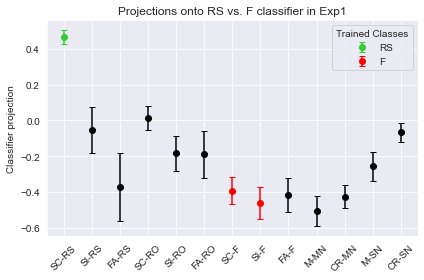

In [15]:
plot_score(stat_1, '1')

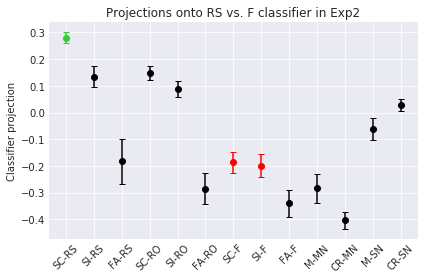

In [68]:
plot_score(stat_2, '2')

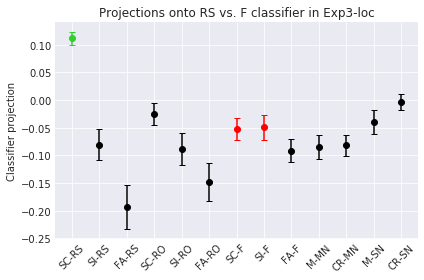

In [69]:
plot_score(stat_3, '3-loc')

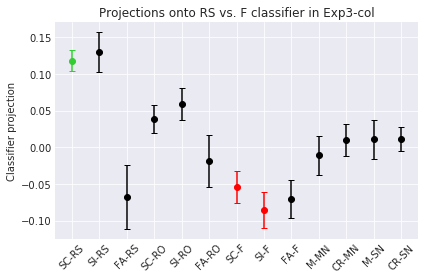

In [70]:
plot_score(stat_4, '3-col')